In [1]:
#Part 1- Import library and data

In [2]:
import scanpy as sc
import anndata as ad
import pandas as pd
import os

/home/sant/anaconda3/envs/scanpy_env/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [3]:
#Setup working directory
!pwd



/home/sant/Github/HackBio-StageTwo


In [4]:
#Global plot settings(optional)
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5,4)  # Adjust figure size
plt.rcParams["axes.grid"] = True  # Add grid to plots
plt.rcParams["axes.edgecolor"] = "black" # Set plot border color
plt.rcParams["axes.linewidth"] = 1.5 # Set plot border width
plt.rcParams["axes.facecolor"] = "white" # Set background color
plt.rcParams["axes.labelcolor"] = "black" # Set label color
plt.rcParams["xtick.color"] = "black" # Set x-axis tick color
plt.rcParams["ytick.color"] = "black" # Set y-axis tick color
plt.rcParams["text.color"] = "black" # Set text color

# Set the default figure directory to the current working directory
# #create a figures directory
# !mkdir figures
# !ls 

#set figures as the directory for saving plots
fig_dir = f"{os.getcwd()}/figures/" #Directory for saving figures outside the plotting function
sc.settings.figdir = './figures' #Directory for saving figures through the plotting function
fig_dir #check the directory

'/home/sant/Github/HackBio-StageTwo/figures/'

In [ ]:
#Download data- already in anndata format
!wget https:::github.com:josoga2:sc:raw:refs:heads:main:bone_marrow.h5ad

In [6]:
#Import the data-anndata format
bone_marrow_adata = ad.read_h5ad('bone_marrow.h5ad')

In [7]:
#Examine the data
print(bone_marrow_adata) #print information for the object
# bone_marrow_adata.obs.head() #Preview observations:cells table
bone_marrow_adata.var.head() #Preview variables:genes table
print(bone_marrow_adata.uns)

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
{'citation': 'Publication: https:

In [8]:
#Modify the var object to contain gene names as index and ensg as columns for easier function later

bone_marrow_adata.var = bone_marrow_adata.var.reset_index(names = 'gene_ids') #convert rows/index to column named gene Ids
bone_marrow_adata.var['feature_name'] = bone_marrow_adata.var['feature_name'].astype(str) #Convert to string from category  in order to create unique values

bone_marrow_adata.var.set_index('feature_name', inplace=True) #Convert the feature name column to index/rows
bone_marrow_adata.var.index.name = None #remove rowname/index title

bone_marrow_adata.var.head() #preview  the var table

,gene_ids,n_cells,feature_is_filtered,feature_reference,feature_biotype,feature_length,feature_type
MED11,ENSG00000161920,927,False,NCBITaxon:9606,gene,754,protein_coding
SERAC1,ENSG00000122335,429,False,NCBITaxon:9606,gene,2683,protein_coding
ALG10B,ENSG00000175548,149,False,NCBITaxon:9606,gene,1773,protein_coding
MTMR3,ENSG00000100330,426,False,NCBITaxon:9606,gene,634,protein_coding
COX8A,ENSG00000176340,7171,False,NCBITaxon:9606,gene,494,protein_coding


In [9]:
#Convert anndata `X` table(cells x gene) to df 
bone_marrow_adata.to_df() #convert dataobject to dataframe
#bone_marrow_adata.var.head() #preview the data table


,MED11,SERAC1,ALG10B,MTMR3,COX8A,NKPD1,FAM201A,NEGR1,SLC39A6,ANKRD55,...,MAP9,FLI1,HNRNPA1L3,BMP2K,LIN7A,THAP4,EEF1AKMT1,ENSG00000284934,ENSG00000261842,C16orf95
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,0.0,0.000000,0.0,0.0,8.389465,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGAGACG-7,0.0,0.000000,0.0,0.0,9.931639,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGATAAG-4,0.0,0.000000,0.0,0.0,10.009642,0.0,0.0,0.0,0.000000,0.0,...,0.0,9.01104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Preview the var_names
bone_marrow_adata.var_names #preview the gene names

Index(['MED11', 'SERAC1', 'ALG10B', 'MTMR3', 'COX8A', 'NKPD1', 'FAM201A',
       'NEGR1', 'SLC39A6', 'ANKRD55',
       ...
       'MAP9', 'FLI1', 'HNRNPA1L3', 'BMP2K', 'LIN7A', 'THAP4', 'EEF1AKMT1',
       'ENSG00000284934', 'ENSG00000261842', 'C16orf95'],
      dtype='object', length=17374)

In [11]:
#Part 2- Quality control 

In [12]:
#Make obs and var names unique- no duplicate values
bone_marrow_adata.obs_names_make_unique()
bone_marrow_adata.var_names_make_unique()

In [13]:
#A. Remove contaminants- mtRNA, Ribosomal RNA, Erythrocytes:RBCs

In [14]:
#Capture mtRNA, RiboRNA, and erythrocyte RNA:Hemoglobin gene and add it to the var table
bone_marrow_adata.var['MT'] = bone_marrow_adata.var_names.str.startswith('MT-') #mitochondrial RNAs
bone_marrow_adata.var['RIBO'] = bone_marrow_adata.var_names.str.startswith('RPS', 'RPL') #Ribosomal RNAs
bone_marrow_adata.var['HB'] = bone_marrow_adata.var_names.str.startswith(r'^HB')


/tmp/ipykernel_284098/230268985.py:3: FutureWarning: Allowing a non-bool 'na' in obj.str.startswith is deprecated and will raise in a future version.
  bone_marrow_adata.var['RIBO'] = bone_marrow_adata.var_names.str.startswith('RPS', 'RPL') #Ribosomal RNAs


In [15]:
#Preview the mtRNA list of genes
mt_genes = bone_marrow_adata.var[bone_marrow_adata.var['MT']]
mt_genes

,gene_ids,n_cells,feature_is_filtered,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB
MT-ATP8,ENSG00000228253,2270,False,NCBITaxon:9606,gene,207,protein_coding,True,False,False
MT-ATP6,ENSG00000198899,15626,False,NCBITaxon:9606,gene,681,protein_coding,True,False,False
MT-ND2,ENSG00000198763,15561,False,NCBITaxon:9606,gene,1042,protein_coding,True,False,False
MT-ND4,ENSG00000198886,15656,False,NCBITaxon:9606,gene,1378,protein_coding,True,False,False
MT-CO1,ENSG00000198804,15656,False,NCBITaxon:9606,gene,1542,protein_coding,True,False,False
MT-ND6,ENSG00000198695,4611,False,NCBITaxon:9606,gene,525,protein_coding,True,False,False
MT-ND4L,ENSG00000212907,6575,False,NCBITaxon:9606,gene,297,protein_coding,True,False,False
MT-ND1,ENSG00000198888,14520,False,NCBITaxon:9606,gene,956,protein_coding,True,False,False
MT-CO2,ENSG00000198712,15669,False,NCBITaxon:9606,gene,684,protein_coding,True,False,False
MT-CYB,ENSG00000198727,15393,False,NCBITaxon:9606,gene,1141,protein_coding,True,False,False


In [16]:
#Preview the RiboRNA list of genes
RIBO_genes = bone_marrow_adata.var[bone_marrow_adata.var['RIBO']]
RIBO_genes

,gene_ids,n_cells,feature_is_filtered,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB
RPS6KA1,ENSG00000117676,2019,False,NCBITaxon:9606,gene,586,protein_coding,False,True,False
RPS25,ENSG00000118181,14810,False,NCBITaxon:9606,gene,609,protein_coding,False,True,False
RPS6KL1,ENSG00000198208,67,False,NCBITaxon:9606,gene,1436,protein_coding,False,True,False
RPS6KC1,ENSG00000136643,310,False,NCBITaxon:9606,gene,4188,protein_coding,False,True,False
RPS3A,ENSG00000145425,14792,False,NCBITaxon:9606,gene,680,protein_coding,False,True,False
RPS24,ENSG00000138326,14982,False,NCBITaxon:9606,gene,645,protein_coding,False,True,False
RPS9,ENSG00000170889,14838,False,NCBITaxon:9606,gene,772,protein_coding,False,True,False
RPS6KB2-AS1,ENSG00000255949,12,False,NCBITaxon:9606,gene,470,lncRNA,False,True,False
RPS3,ENSG00000149273,15238,False,NCBITaxon:9606,gene,754,protein_coding,False,True,False
RPS27,ENSG00000177954,15382,False,NCBITaxon:9606,gene,496,protein_coding,False,True,False


In [17]:
#Preview the HB list of genes
HB_genes = bone_marrow_adata.var[bone_marrow_adata.var['HB']]
HB_genes

##No hb gene found so there's no need to consider this downstream...

,gene_ids,n_cells,feature_is_filtered,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB


In [18]:
#Examine the genes table with all the qc labels added(mt, ribo, hb)
bone_marrow_adata.var.head()

,gene_ids,n_cells,feature_is_filtered,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB
MED11,ENSG00000161920,927,False,NCBITaxon:9606,gene,754,protein_coding,False,False,False
SERAC1,ENSG00000122335,429,False,NCBITaxon:9606,gene,2683,protein_coding,False,False,False
ALG10B,ENSG00000175548,149,False,NCBITaxon:9606,gene,1773,protein_coding,False,False,False
MTMR3,ENSG00000100330,426,False,NCBITaxon:9606,gene,634,protein_coding,False,False,False
COX8A,ENSG00000176340,7171,False,NCBITaxon:9606,gene,494,protein_coding,False,False,False


In [19]:
#B. Calculate and visualize qc metrics 

In [20]:
#Calculate and return qc metrics to anndata
sc.pp.calculate_qc_metrics(bone_marrow_adata, qc_vars=['MT', 'RIBO', 'HB'], inplace=True, log1p=True )

In [21]:
#Check the qc metrics in the dataset
bone_marrow_adata.obs.columns

Index(['disease stage', 'treatment', 'timepoint', 'Dataset', 'sample',
       'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage',
       'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts',
       'percent_mito', 'tissue_original', 'tissue_ontology_term_id',
       'disease_ontology_term_id', 'donor_id',
       'development_stage_ontology_term_id', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id',
       'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease',
       'sex', 'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_MT',
       'log1p_total_counts_MT', 'pct_counts_MT', 't

In [22]:
#Visualize qc metrics- genes counts per cell, total counts, mito, ribo, hb

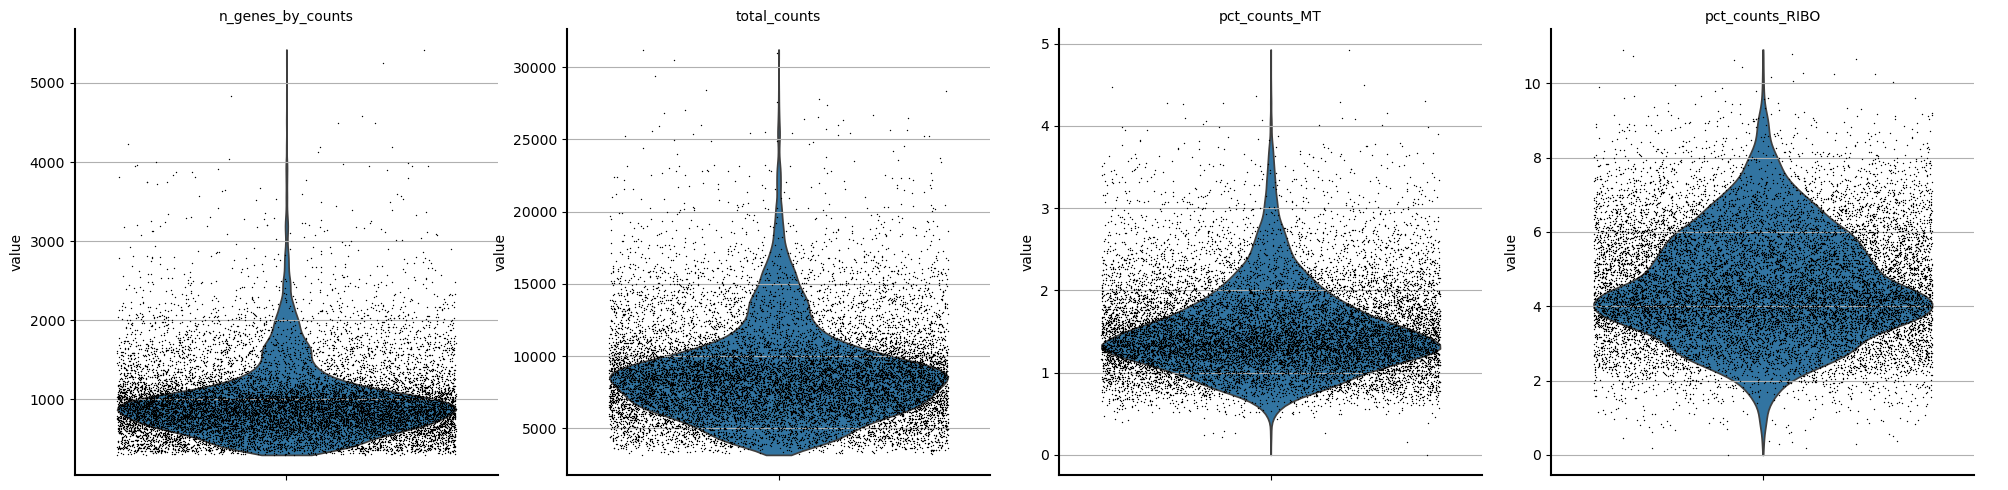

In [ ]:
## gene counts per cell, total_counts, pct_counts_MT, and pct_counts_RIBO
sc.pl.violin(bone_marrow_adata,
             keys=['n_genes_by_counts','total_counts', 'pct_counts_MT', 'pct_counts_RIBO'],
             jitter=0.4,
             multi_panel=True)

In [24]:
#C- Visualize and filter cells for qc metrics

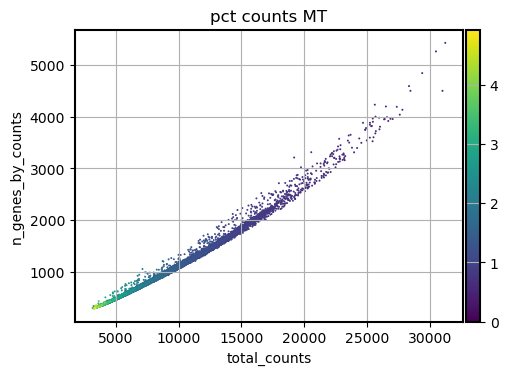

In [ ]:
#Plotting Genes per cell by total count, colored by mtRNA or RIBO

sc.pl.scatter(bone_marrow_adata,
              x='total_counts',
              y='n_genes_by_counts',
              color='pct_counts_MT')


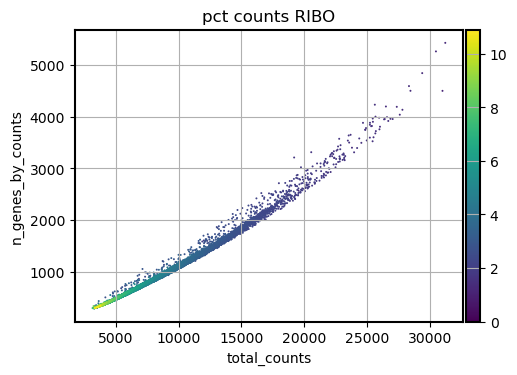

In [ ]:
#Plotting Genes per cell by total count, colored by Ribosomal RNA
sc.pl.scatter(bone_marrow_adata,
              x='total_counts', 
              y='n_genes_by_counts',
              color='pct_counts_RIBO')


In [27]:
#Filter cells based on known criteria
sc.pp.filter_cells(bone_marrow_adata, min_genes=200)#get rid of unhealthy cells or empty droplets, alternatively, can lower threshold to 200, to capture more cells
# sc.pp.filter_cells(bone_marrow_adata, max_genes= 3000) #potentially take out doublets or multiplets... not much in this dataset
sc.pp.filter_genes(bone_marrow_adata, min_cells=20)#min cells to take per gene, can be more stringent

In [28]:
#Filter pct mitochondrial genes to be below 5% and % RIBO to be below 10% in the data
bone_marrow_adata = bone_marrow_adata[bone_marrow_adata.obs['pct_counts_MT'] < 5, :]
bone_marrow_adata = bone_marrow_adata[bone_marrow_adata.obs['pct_counts_RIBO'] < 10, :]

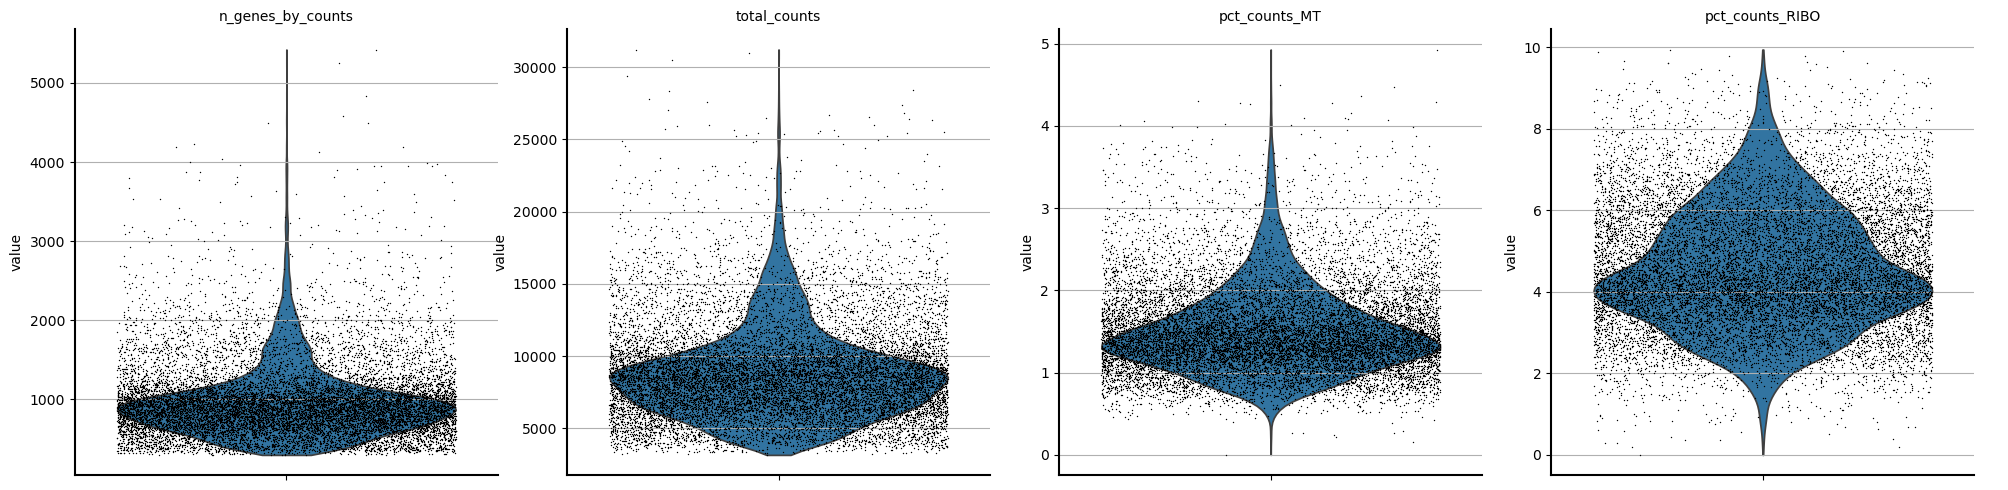

In [ ]:
##Violin plot for % mito in cells after filtering

#violin plot
sc.pl.violin(bone_marrow_adata,
             keys=['n_genes_by_counts','total_counts', 'pct_counts_MT', 'pct_counts_RIBO'],
             jitter=0.4,
             multi_panel=True)

#Cells probably already filtered for mt count

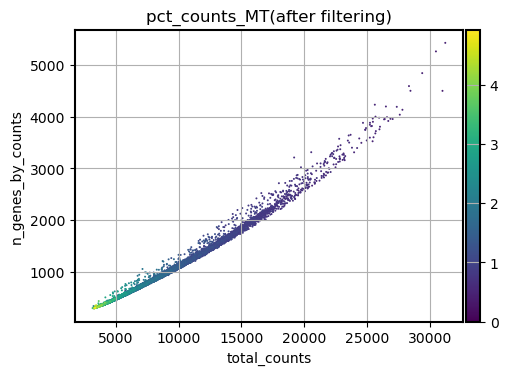

In [ ]:
#Plotting Genes per cell by total count, colored by mtRNA after filtering
sc.pl.scatter(bone_marrow_adata,
              x='total_counts',
              y='n_genes_by_counts',
              color='pct_counts_MT',
              title='pct_counts_MT(after filtering)'
              )

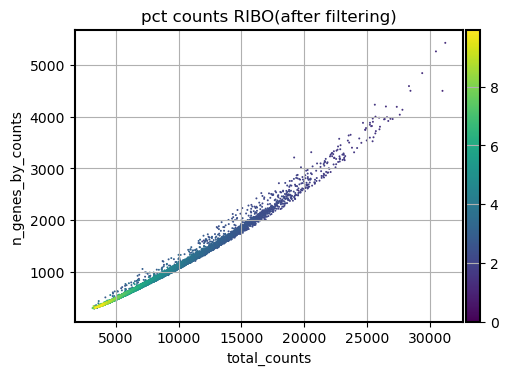

In [ ]:
#Plotting Genes per cell by total count, colored by Ribosomal RNA after filtering

sc.pl.scatter(bone_marrow_adata,
              x='total_counts',
              y='n_genes_by_counts',
              color='pct_counts_RIBO', title='pct counts RIBO(after filtering)')

In [32]:
#Doublet labeling
sc.pp.scrublet(bone_marrow_adata, random_state=42)

/home/sant/anaconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/preprocessing/_scrublet/__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


In [36]:
##Examine the data after doublet labeling
bone_marrow_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB,doublet_score,predicted_doublet
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,4.937034,1.154665,357.311005,5.881402,2.981970,0.0,0.0,0.0,0.010731,False
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,4.743712,1.350507,376.610626,5.933864,4.467032,0.0,0.0,0.0,0.054483,False
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,4.836825,1.543431,385.375214,5.956809,4.755794,0.0,0.0,0.0,0.073662,False
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,4.648942,1.182754,388.487671,5.964832,4.440570,0.0,0.0,0.0,0.133446,False
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,4.938287,2.870118,352.302429,5.867324,7.299080,0.0,0.0,0.0,0.066339,False


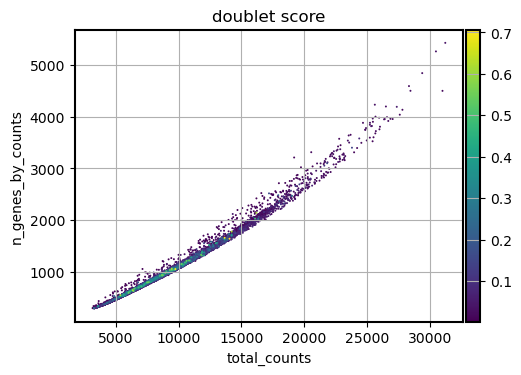

In [33]:
#Show doublets on the scatterplot
sc.pl.scatter(bone_marrow_adata,
              x='total_counts',
              y='n_genes_by_counts',
              color='doublet_score')

In [34]:
#Make copy of the data and put it in the layers metadata
bone_marrow_adata.layers["counts"] = bone_marrow_adata.X.copy()

In [39]:
#Part 3- Normalization, Dim. Reduction, and Clustering

In [35]:
#A. Normalize and log transform genes
sc.pp.normalize_total(bone_marrow_adata)
sc.pp.log1p(bone_marrow_adata)

In [36]:
#B. Find highly variable features

#Find the variable features
sc.pp.highly_variable_genes(bone_marrow_adata, n_top_genes=500)

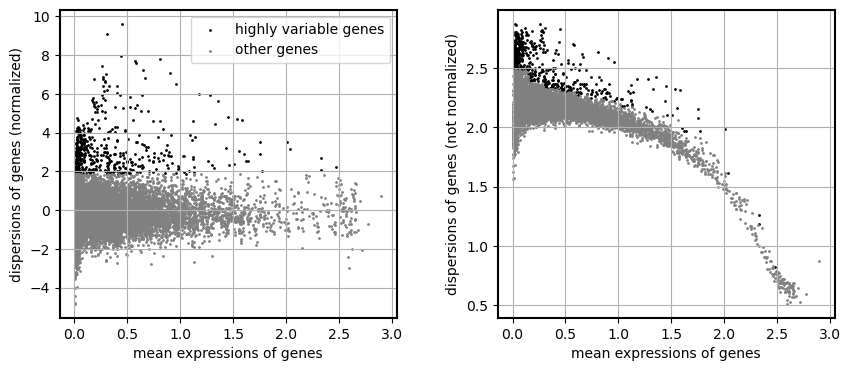

In [ ]:
#Plot the highly variable features
sc.pl.highly_variable_genes(bone_marrow_adata)

In [38]:
#C. Run PCA analysis

 #Scale the genes to be '0' mean and '1' variance (optional)
#sc.pp.scale(bone_marrow_adata)

#Run PCA analysis
sc.tl.pca(bone_marrow_adata, random_state=42)

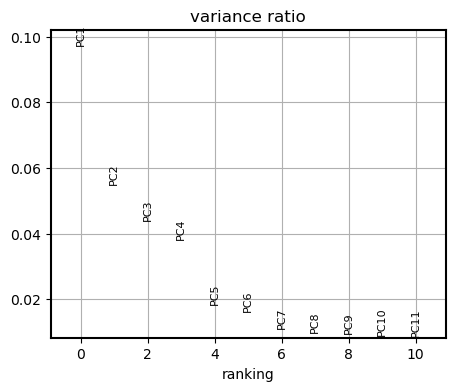

In [ ]:
#Visualize the variance ratio & contribution of each PC to variance

sc.pl.pca_variance_ratio(bone_marrow_adata, n_pcs=10, log=False)

#


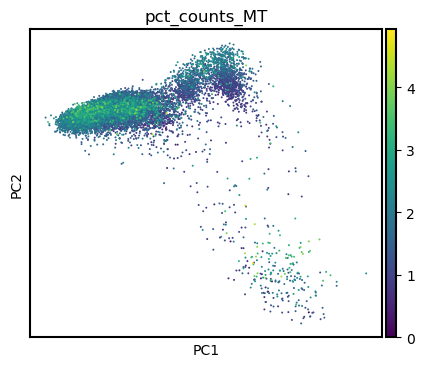

In [ ]:
##Plot pc1 vs pc2
sc.pl.pca(bone_marrow_adata,
          color = ["pct_counts_MT"]         
          )

##Each dot in the figure is a cell


In [46]:
#D. Find nearest neighbors and run umap

In [41]:
#Find nearest neighbors
sc.pp.neighbors(bone_marrow_adata, random_state=42)

/home/sant/anaconda3/envs/scanpy_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
#Run umap to find clusters
sc.tl.umap(bone_marrow_adata, random_state=42)


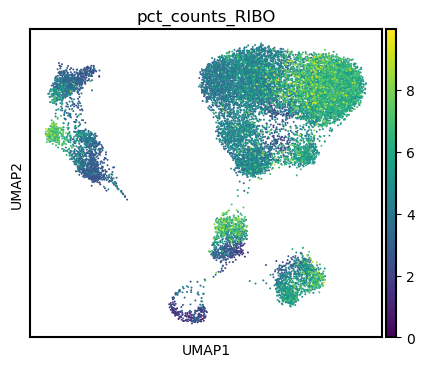

In [ ]:
#Create umap plot
sc.pl.umap(bone_marrow_adata, color=['pct_counts_RIBO'], size=8) #colored by pct_RIBO or can also do doublet


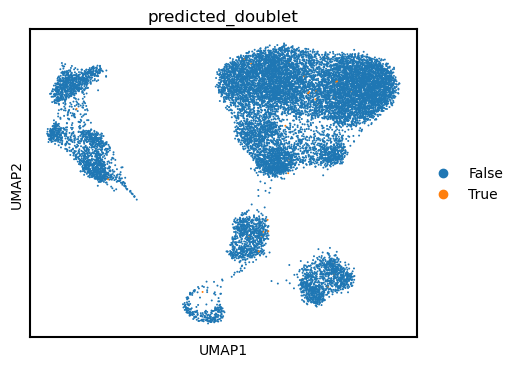

In [ ]:
sc.pl.umap(bone_marrow_adata, color=['predicted_doublet'], size=8)

In [45]:
#Create clusters with Leiden at 0.5 resolution...tweak the resolution(0.02,1,2 etc) to find one that doesn't give too many or too few clusters
sc.tl.leiden(bone_marrow_adata, 
             resolution=0.5,
             key_added='leiden_res0_5',
             flavor='igraph', 
             n_iterations=2,
             random_state=42)

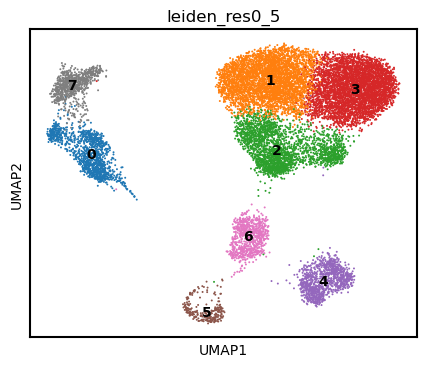

In [ ]:
#Create umap using the clusters from leiden..find the resolution that gives not too many or few clusters
sc.pl.umap(bone_marrow_adata,
           color = ['leiden_res0_5'],
           legend_loc = 'on data',
           size = 8)

In [53]:
#Part 4. Cell annotation and population identification

In [47]:
#A. Create marker list using decoupler

#Import decoupler
import decoupler as dc

#Retrieve markers from annotation database
markers = dc.op.resource(name= 'PanglaoDB', organism = 'human')

In [55]:
print(markers)

     genesymbol  canonical_marker                   cell_type germ_layer  \
                                                                           
0          A1CF             False                 Hepatocytes   Endoderm   
1        A2APA5             False                  Germ cells   Mesoderm   
2           A2M              True               Bergmann glia   Ectoderm   
3        A3FIN4             False                  Mast cells   Mesoderm   
4        A4GALT              True                  Mast cells   Mesoderm   
...         ...               ...                         ...        ...   
8206     ZNF521             False  Adipocyte progenitor cells   Mesoderm   
8207      ZNRF4             False                  Germ cells   Mesoderm   
8208      ZPBP2              True                  Germ cells   Mesoderm   
8209    ZRSR2P1             False                     Neurons   Ectoderm   
8210    ZSCAN10             False        Embryonic stem cells   Epiblast   

      human

In [48]:
#Keep the canonical markers and remvoe duplicates
markers = markers[markers['canonical_marker']]

#Remove duplicates
markers = markers[~markers.duplicated(['cell_type', 'genesymbol'])]

#Format the markers column names for use with decoupler library
markers = markers.rename(columns={'cell_type':'source', 'genesymbol':'target'})

#select columns
markers = markers[['source', 'target']]

In [49]:
#B. Import matrix data into dc then calculate score for each cell type
markers

,source,target
,,
2,Bergmann glia,A2M
4,Mast cells,A4GALT
5,Embryonic stem cells,A7KBS4
8,Pinealocytes,AANAT
9,Astrocytes,AANAT
...,...,...
8201,B cells naive,ZNF286A
8202,Pluripotent stem cells,ZNF296
8203,Adipocytes,ZNF423


In [50]:
#Import the matrix into dc
dc.mt.ulm(data=bone_marrow_adata,
          net=markers,
          tmin=3)


In [51]:
#Creates a new anndata object called 'score' by copying the obsm anndata object(for umap and other plots)
score = dc.pp.get_obsm(bone_marrow_adata, key = 'score_ulm')

In [52]:
#preview the data with scores
bone_marrow_adata.obsm['score_ulm'].head()


,Acinar cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Astrocytes,B cells,B cells memory,B cells naive,...,Smooth muscle cells,T cells,T follicular helper cells,T helper cells,T regulatory cells,Tanycytes,Taste receptor cells,Thymocytes,Tuft cells,Urothelial cells
Guo-AAACCTGAGAGCTTCT-2,1.219256,-0.006340,-0.574469,-0.663366,1.049042,0.802489,0.256500,1.128643,-0.711200,-0.252003,...,-1.569187,-0.730447,-0.574469,-0.519818,-0.027930,0.470003,0.505618,-0.777427,3.103763,-0.741695
Guo-AAACCTGAGAGGTTGC-7,-0.824860,-1.303538,-0.451675,-0.521569,1.817908,1.164992,0.125507,0.244190,-0.909165,1.240433,...,-1.672174,7.360640,-0.451675,2.965853,0.442494,0.824571,0.997092,3.274580,-0.217615,-0.583154
Guo-AAACCTGAGATACACA-3,-0.811986,-0.700324,-0.444626,-0.513429,1.805205,1.134443,1.616736,3.484704,1.433597,1.908963,...,-1.646072,7.002106,-0.444626,1.042087,-0.811986,0.851560,-0.628867,1.513842,0.835974,-0.574053
Guo-AAACCTGAGCGATTCT-1,-0.839977,-0.793466,-0.459953,-0.531128,0.407306,1.125715,0.736825,4.022192,0.685168,1.196440,...,-1.086041,7.757314,-0.459953,-0.011282,-0.839977,-0.702695,-0.650545,0.618145,1.691346,-0.593841
Guo-AAACCTGAGTGAAGAG-3,-0.582981,-0.518366,-0.319230,-0.368629,-0.582981,1.916527,0.000083,1.394228,1.610742,1.585116,...,-1.181788,1.222945,-0.319230,2.028832,1.166149,-0.487703,-0.451509,-0.845160,1.775030,-0.412155


In [53]:
#print available cell columns in data
bone_marrow_adata.obsm["score_ulm"].columns


Index(['Acinar cells', 'Adipocytes', 'Adrenergic neurons',
       'Airway goblet cells', 'Alpha cells', 'Alveolar macrophages',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive',
       ...
       'Smooth muscle cells', 'T cells', 'T follicular helper cells',
       'T helper cells', 'T regulatory cells', 'Tanycytes',
       'Taste receptor cells', 'Thymocytes', 'Tuft cells', 'Urothelial cells'],
      dtype='object', length=116)

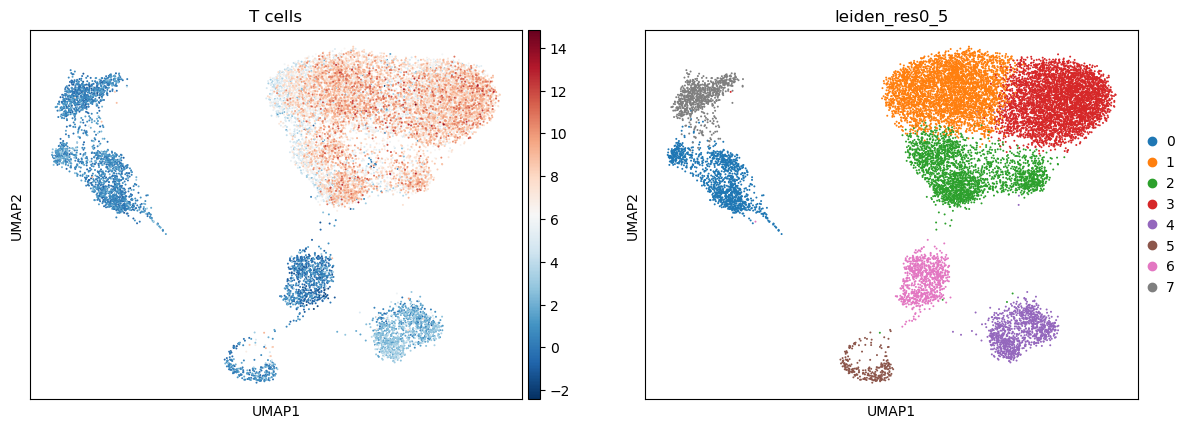

In [ ]:
#Visualize a cell population using umap
sc.pl.umap(score, color=['T cells', 'leiden_res0_5'], cmap='RdBu_r')

2025-11-22 15:55:36 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-22 15:55:36 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-22 15:55:36 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-22 15:55:36 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-22 15:55:36 | [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

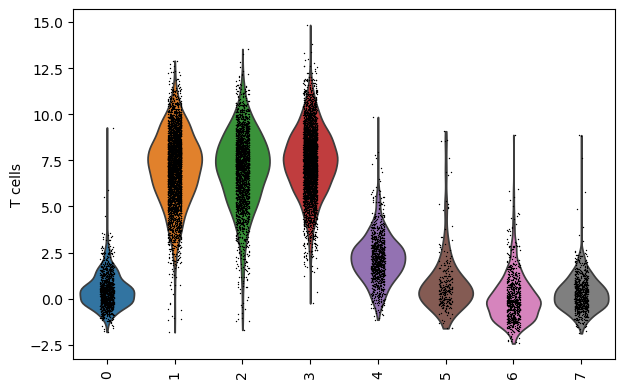

In [63]:
#Visualize cell population using violinplot
sc.pl.violin(score, 
             keys=['T cells'],
             groupby='leiden_res0_5',
             rotation=90)

In [64]:
#Automated annotation for all clusters

In [54]:
#Rank the annotation in each cluster using decoupler based on the score
bone_marrow_adata_rank = dc.tl.rankby_group(score, 
                                            groupby='leiden_res0_5',
                                            reference='rest',
                                            method='t-test_overestim_var')


In [55]:
#View the rankings
bone_marrow_adata_rank.columns

Index(['group', 'reference', 'name', 'stat', 'meanchange', 'pval', 'padj'], dtype='object')

In [67]:
bone_marrow_adata_rank.head()

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Neutrophils,114.143397,6.107299,0.0,0.0
1,0,rest,Macrophages,89.676580,5.381392,0.0,0.0
2,0,rest,Dendritic cells,85.170830,5.176219,0.0,0.0
3,0,rest,Microglia,83.139708,4.119585,0.0,0.0
4,0,rest,Monocytes,81.728994,5.124395,0.0,0.0


In [56]:
#Filter the annotation to only contain the highest score for each cluster
cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank['stat']>0].groupby('group').head(1).set_index('group')['name'].to_dict()

/tmp/ipykernel_284098/4214301984.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = bone_marrow_adata_rank[bone_marrow_adata_rank['stat']>0].groupby('group').head(1).set_index('group')['name'].to_dict()


In [69]:
#Preview the assigned annotations for each cluster
cluster_annotations

{'0': 'Neutrophils',
 '1': 'Gamma delta T cells',
 '3': 'Nuocytes',
 '2': 'NK cells',
 '4': 'B cells naive',
 '5': 'Platelets',
 '6': 'Plasma cells',
 '7': 'Monocytes'}

In [57]:
#Add the cluster annotations into the anndata object
bone_marrow_adata.obs['cell_type'] = bone_marrow_adata.obs['leiden_res0_5'].map(cluster_annotations)

In [59]:
#Add the cell annotation information to the score anndata object for umap
score.obs['cell_type'] = bone_marrow_adata.obs['cell_type']

In [ ]:
#Visualize all the cell populations on the umap

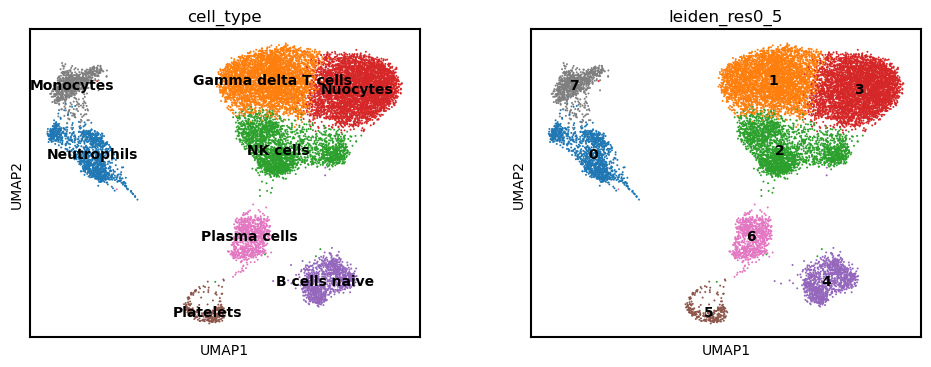

In [ ]:
##Visualize umap with all the cell populations labeled on the umap
sc.pl.umap(score, color=['cell_type','leiden_res0_5'], cmap='RdBu_r', legend_loc ='on data')

In [71]:
bone_marrow_adata.obs['cell_type']
bone_marrow_adata.var_names

Index(['MED11', 'SERAC1', 'ALG10B', 'MTMR3', 'COX8A', 'FAM201A', 'NEGR1',
       'SLC39A6', 'ANKRD55', 'TYW3',
       ...
       'ATPSCKMT', 'ENSG00000279159', 'DCP2', 'MAP9', 'FLI1', 'HNRNPA1L3',
       'BMP2K', 'THAP4', 'EEF1AKMT1', 'C16orf95'],
      dtype='object', length=14144)

In [62]:
# Subsetting cells using multiple genes in the 'source' column

#create an available genes list from dataset
available_genes = set(bone_marrow_adata.var_names)


In [63]:

#Gather marker list for population 1
#Get cell markers/target genes from markers list- list of markers from database
Neutrophils_markers = markers[markers['source'].isin(['Neutrophils'])]['target']

#Filter Neutrophil cell markers list to match genes in the dataset
Neutrophils_markers = Neutrophils_markers[Neutrophils_markers.isin(available_genes)]


In [64]:
#Gather marker list for population 2
#Get cell markers/target genes from markers list- list of markers from database
Gamma_Delta_T_cell_markers = markers[markers['source'].isin(['Gamma delta T cells'])]['target']

#Filter T cell markers list to match genes in the dataset
Gamma_Delta_T_cell_markers = Gamma_Delta_T_cell_markers[Gamma_Delta_T_cell_markers.isin(available_genes)]


In [65]:
#Gather marker list for population 3
#Get cell markers/target genes from markers list- list of markers from database
Nuocytes_markers = markers[markers['source'].isin(['Nuocytes'])]['target']

#Filter T cell markers list to match genes in the dataset
Nuocytes_markers = Nuocytes_markers[Nuocytes_markers.isin(available_genes)]


In [66]:
#Gather marker list for population 4
#Get cell markers/target genes from markers list- list of markers from database
nk_cell_markers = markers[markers['source'].isin(['NK cells'])]['target']

#Filter NK cell markers list to match genes in the dataset
nk_cell_markers = nk_cell_markers[nk_cell_markers.isin(available_genes)]

In [67]:
#Gather marker list for population 5
#Get cell markers/target genes from markers list- list of markers from database
B_cells_naive = markers[markers['source'].isin(['B cells naive'])]['target']

#Filter B cell markers list to match genes in the dataset
B_cells_naive = B_cells_naive[B_cells_naive.isin(available_genes)]

In [68]:
#Gather marker list for population 6
#Get cell markers/target genes from markers list- list of markers from database
Platelets_markers = markers[markers['source'].isin(['Platelets'])]['target']

#Filter NK cell markers list to match genes in the dataset
Platelets_markers = Platelets_markers[Platelets_markers.isin(available_genes)]

In [69]:
#Gather marker list for population 7
#Get cell markers/target genes from markers list- list of markers from database
Plasma_cell_markers = markers[markers['source'].isin(['Plasma cells'])]['target']

#Filter Plasma cell markers list to match genes in the dataset
Plasma_cell_markers = Plasma_cell_markers[Plasma_cell_markers.isin(available_genes)]

In [70]:
#Gather marker list for population 8
#Get cell markers/target genes from markers list- list of markers from database
monocyte_markers = markers[markers['source'].isin(['Monocytes'])]['target']

#Filter NK cell markers list to match genes in the dataset
monocyte_markers = monocyte_markers[monocyte_markers.isin(available_genes)]

In [71]:
#Part 5. Plotting the annotated cell population distribution

In [72]:
#Create a dictionary containing the marker genes and markers
marker_genes_dict = {
    "Neutrophils": Neutrophils_markers.head().to_list(), #take the top 5 values and create a list from the markers table
    "Gamma_Delta T cells": Gamma_Delta_T_cell_markers.head().to_list(),
    "Nuocytes": Nuocytes_markers.head().to_list(),
    "NK cells": nk_cell_markers.head().to_list(),
    "B cells(naive)": B_cells_naive.head().to_list(),
    "Platelets": Platelets_markers.head().to_list(),
    "Plasma cells": Plasma_cell_markers.head().to_list(),
    "Monocytes": monocyte_markers.head().to_list(),
}


categories: 0, 1, 2, etc.
var_group_labels: Neutrophils, Gamma_Delta T cells, Nuocytes, etc.


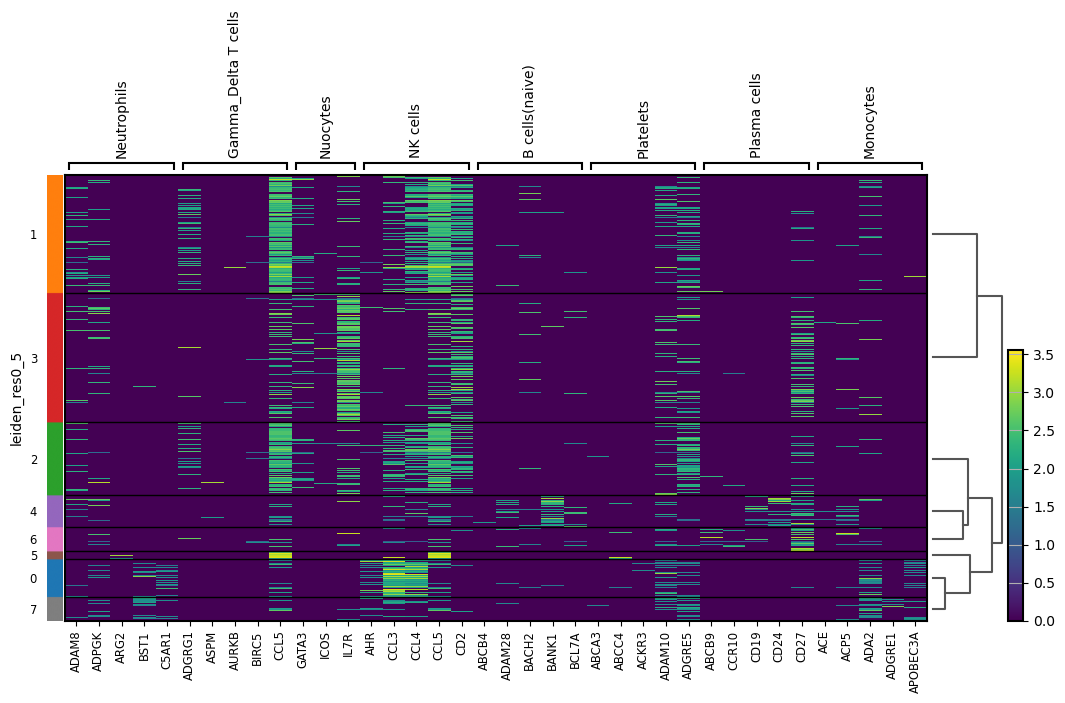

In [73]:
#Plot heatmap of marker genes by population
sc.pl.heatmap(bone_marrow_adata, 
              marker_genes_dict,
              groupby='leiden_res0_5', #Can alternatively group by the cell types
              cmap='viridis', 
              dendrogram = True,
              use_raw=False)

In [74]:
{'0': 'Neutrophils',
 '1': 'Gamma delta T cells',
 '3': 'Nuocytes',
 '2': 'NK cells',
 '4': 'B cells naive',
 '5': 'Platelets',
 '6': 'Plasma cells',
 '7': 'Monocytes'}

{'0': 'Neutrophils',
 '1': 'Gamma delta T cells',
 '3': 'Nuocytes',
 '2': 'NK cells',
 '4': 'B cells naive',
 '5': 'Platelets',
 '6': 'Plasma cells',
 '7': 'Monocytes'}

In [75]:
#debugging if you run into errors with finding the genes in anndata
# marker_genes_dict.values.__contains__('ADAM28')


categories: Neutrophils, Gamma delta T cells, NK cells, etc.
var_group_labels: Neutrophils, Gamma_Delta T cells, Nuocytes, etc.


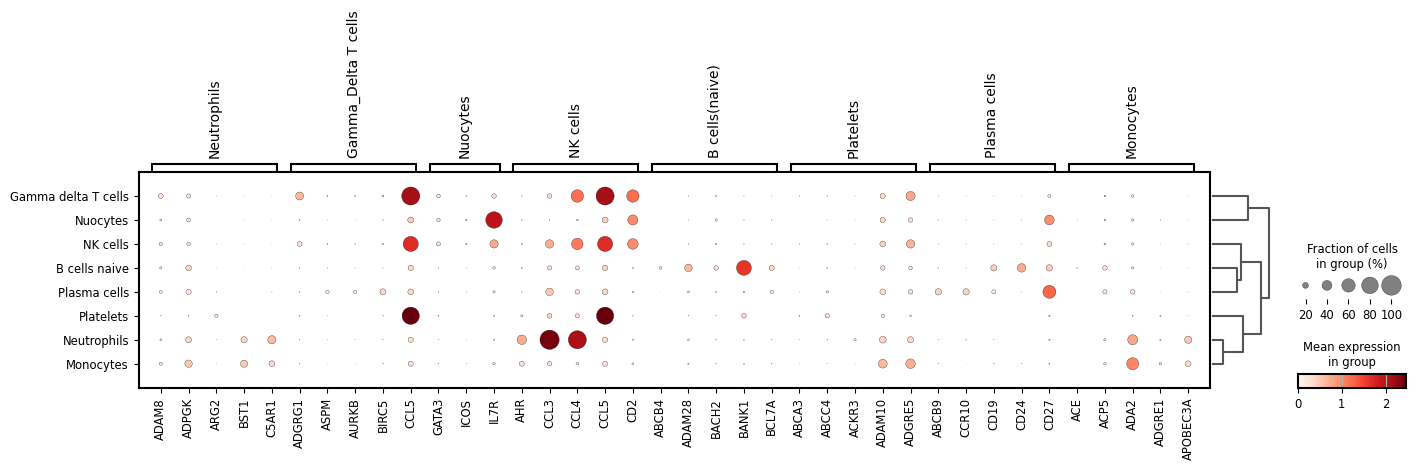

In [ ]:
sc.pl.dotplot(bone_marrow_adata, marker_genes_dict, "cell_type", dendrogram=True, use_raw=False)

categories: 0, 1, 2, etc.
var_group_labels: Neutrophils, Gamma_Delta T cells, Nuocytes, etc.


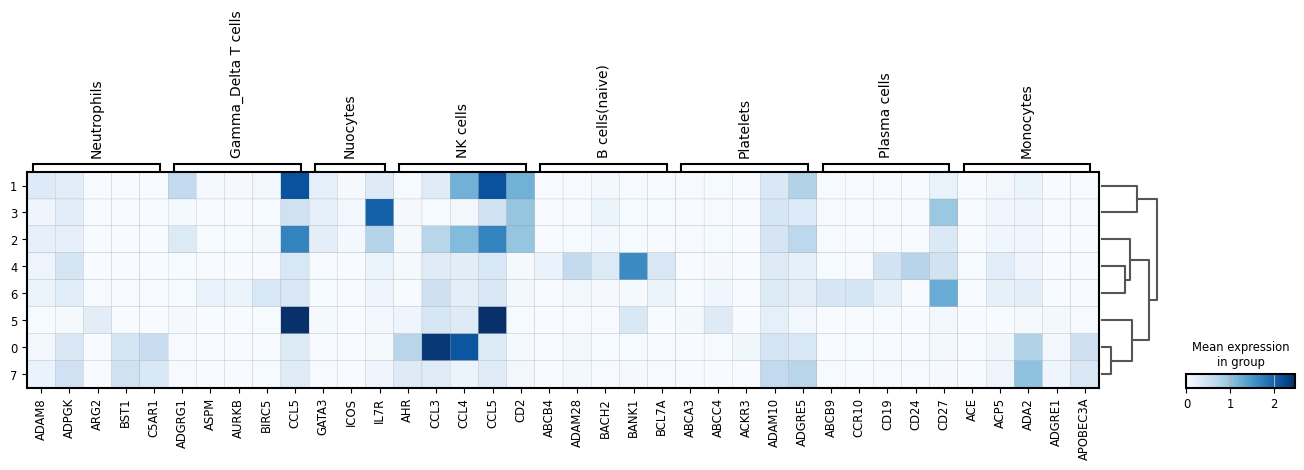

In [77]:
#Plot matrixplot of marker genes by population
sc.pl.matrixplot(bone_marrow_adata, 
              marker_genes_dict, 
              groupby='leiden_res0_5', 
              cmap='Blues', 
              dendrogram = True,
              use_raw=False)

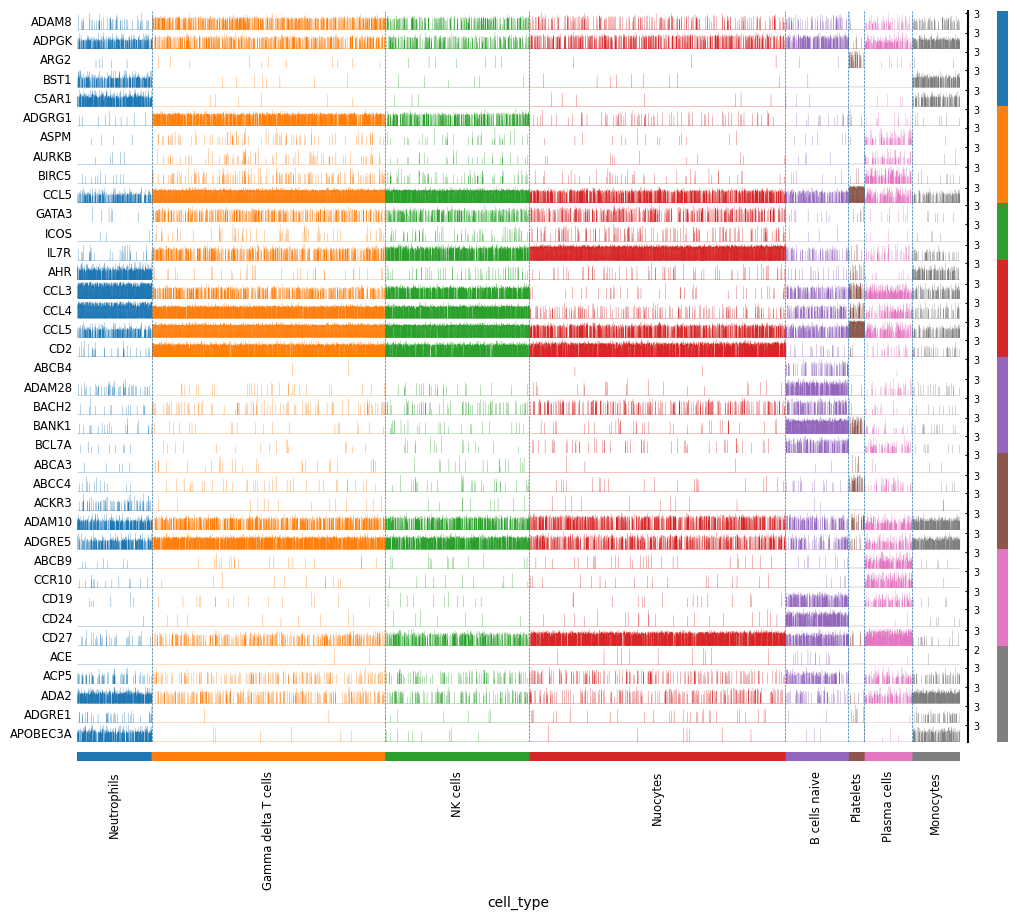

In [78]:
# Tracksplot by cell type..to look at common and distinct annotations...
sc.pl.tracksplot(bone_marrow_adata, 
                 marker_genes_dict, 
                 groupby='cell_type',  #can alternatively do it by cluster 'leiden_res0_5'
                 dendrogram=False,
                 use_raw=False)

categories: Neutrophils, Gamma delta T cells, NK cells, etc.
var_group_labels: Neutrophils, Gamma_Delta T cells, Nuocytes, etc.


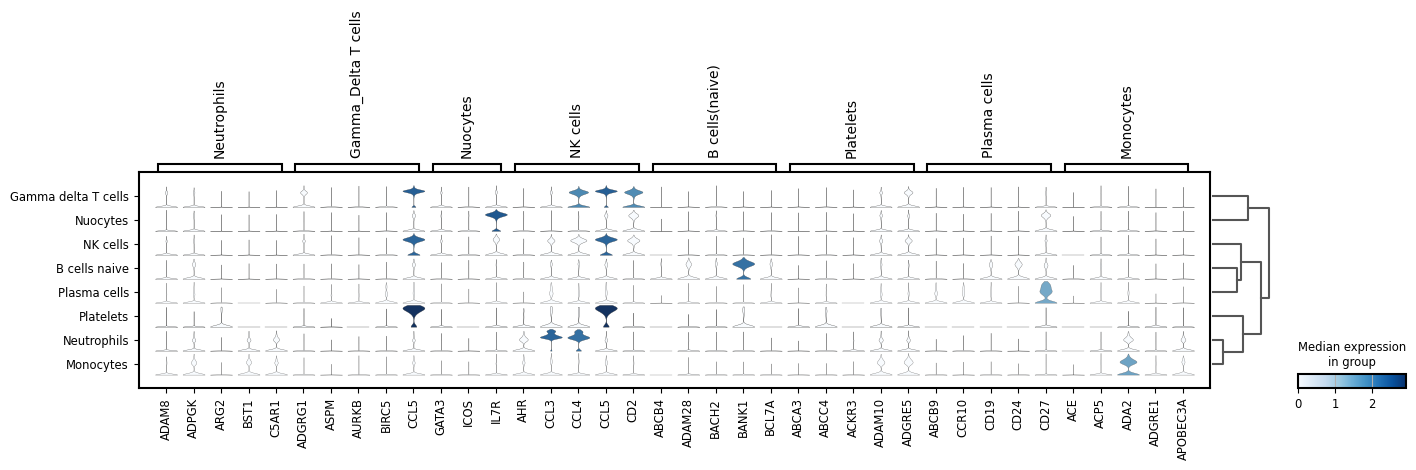

In [79]:
#Stacked Violin, shown by cell type
sc.pl.stacked_violin(
    bone_marrow_adata,marker_genes_dict,'cell_type',  dendrogram=True, use_raw=False
)